In [1]:
import pandas as pd
import numpy as sns
import seaborn as sns

In [2]:
data = pd.read_csv("/content/sample_data/california_housing_train.csv")

In [3]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [4]:
data.shape

(17000, 9)

In [5]:
data.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [6]:
data.duplicated().sum()

0

In [7]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## Training a Perceptron

In [8]:
from sklearn.linear_model import Perceptron

In [9]:
X = data.drop("median_house_value", axis=1)
y = data['median_house_value']

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4, random_state=42)

In [11]:
model = Perceptron()
model.fit(X_train, y_train)

Perceptron()

In [12]:
X_train.shape

(10200, 8)

In [13]:
model.coef_

array([[-1.69720000e+02,  9.84800000e+01,  2.20000000e+02, ...,
        -1.80200000e+03, -2.50000000e+01, -1.71066000e+01],
       [ 2.24262000e+03, -6.02810000e+02, -5.10000000e+02, ...,
        -6.27800000e+03, -5.20900000e+03, -1.42340900e+02],
       [ 3.63290000e+02, -1.14600000e+02,  6.80000000e+01, ...,
        -6.82000000e+02, -8.29000000e+02, -2.59833000e+01],
       ...,
       [-3.48200000e+02,  9.44700000e+01,  1.16000000e+02, ...,
        -5.26500000e+03, -3.00300000e+03,  2.68363000e+01],
       [ 2.77100000e+01, -7.86800000e+01,  5.97000000e+02, ...,
        -3.97700000e+03,  3.68900000e+03,  3.00751000e+01],
       [ 3.95300000e+03, -4.18268000e+03,  2.05730000e+04, ...,
        -2.40420000e+04,  4.80950000e+04,  1.12971394e+04]])

In [14]:
len(model.intercept_)

3208

## Creating a NN with tensorflow

In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten


In [16]:
from sklearn.preprocessing import StandardScaler
# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
# Build the ANN model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train_scaled.shape[1]))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))  # Output layer for regression

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                576       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 8,961
Trainable params: 8,961
Non-trainable params: 0
_________________________________________________________________


In [19]:
from tensorflow import keras

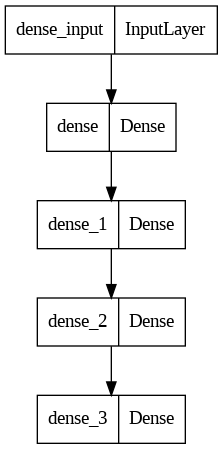

In [20]:
import pydot
keras.utils.plot_model(model)

In [21]:
w ,b = model.layers[1].get_weights()

In [22]:
w

array([[ 0.05560263, -0.2155772 ,  0.0348791 , ..., -0.06227075,
         0.02107976,  0.16358574],
       [ 0.06450467,  0.12867753,  0.19683053, ...,  0.1184992 ,
        -0.06760837, -0.06990191],
       [ 0.00293584,  0.20930569,  0.01930457, ...,  0.00434169,
        -0.1860793 ,  0.08069284],
       ...,
       [-0.12328973,  0.01870765,  0.20086958, ...,  0.20445116,
         0.11664267, -0.11921228],
       [-0.04688257, -0.0175471 , -0.09646739, ...,  0.00245512,
         0.02855095,  0.1241893 ],
       [-0.00696197,  0.06267823,  0.06335314, ...,  0.1937073 ,
         0.18177803,  0.18395965]], dtype=float32)

In [23]:
b

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [24]:
# Number of Parameters
model.count_params()

8961

In [25]:
# Compile the model
model.compile(loss='mean_squared_error', optimizer='sgd')

In [26]:
# Train the model
model.fit(X_train_scaled, y_train, epochs=30, batch_size=32, validation_data=(X_test_scaled, y_test))

Epoch 1/30
319/319 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 2/30
319/319 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 3/30
319/319 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 4/30
319/319 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 5/30
319/319 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 6/30
319/319 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 7/30
319/319 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 8/30
319/319 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 9/30
319/319 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 10/30
319/319 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 11/30
319/319 [==============================] - 1s 2

In [27]:
from keras.datasets import fashion_mnist

In [28]:
## Load Fashion Mnist data
(X_train, y_train), (X_test,y_test) = fashion_mnist.load_data()

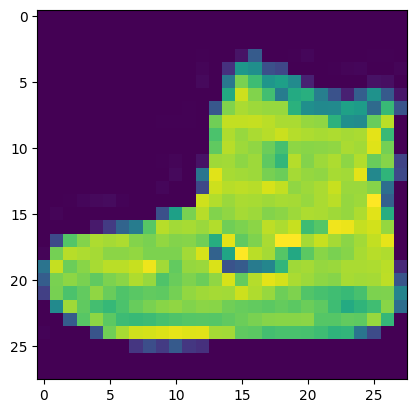

In [29]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

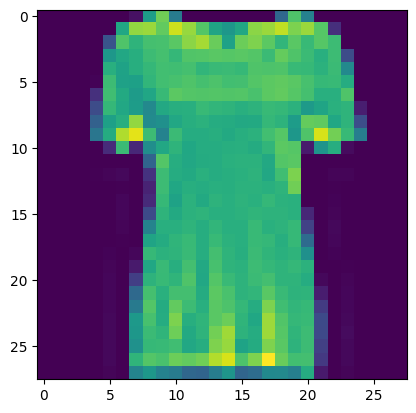

In [30]:
plt.imshow(X_train[10])

In [31]:
y_train[0]

9

In [32]:
y_train[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [33]:
className = {0 :'T-shirt/top',
              1: 'Trouser',
              2: 'Pullover',
              3: 'Dress',
              4: 'Coat',
              5: 'Sandal',
              6: 'Shirt',
              7: 'Sneaker',
              8: 'Bag',
              9: 'Ankle boot'}

In [34]:
className[y_train[10]]

'T-shirt/top'

In [35]:
X_train[10]

array([[  0,   0,   0,   0,   0,   0,   0,  11, 142, 200, 106,   0,   0,
          0,   0,   0,   0,   0,  85, 185, 112,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 152, 214, 217, 194, 236, 216, 187,
        149, 135, 153, 211, 217, 231, 205, 217, 188,  34,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  66, 185, 166, 180, 181, 190, 211, 221,
        197, 146, 198, 206, 191, 168, 190, 172, 188, 175,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 135, 153, 160, 175, 180, 170, 186, 187,
        190, 188, 190, 187, 174, 195, 185, 174, 161, 175,  59,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 161, 147, 160, 170, 178, 177, 180, 168,
        173, 174, 171, 185, 184, 185, 172, 171, 164, 174, 120,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   2, 175, 146, 145, 168, 178, 181, 185, 180,
        184, 178, 179, 187, 191, 193, 190, 181, 171, 172, 158,   0,   0,
          0,   0],
       [  

In [36]:
X_train.min()

0

In [37]:
X_train.max()

255

In [38]:
## norminalization
X_train_n = X_train/255

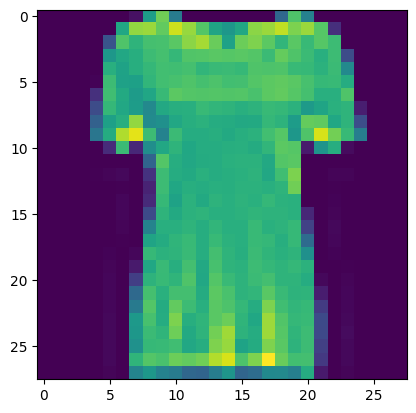

In [39]:
plt.imshow(X_train_n[10])

In [40]:
X_train_n[10]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.04313725, 0.55686275, 0.78431373,
        0.41568627, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.33333333, 0.7254902 ,
        0.43921569, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.59607843, 0.83921569, 0.85098039, 0.76078431,
        0.9254902 , 0.84705882, 0.73333333, 0.58431373, 0.52941176,
        0.6       , 0.82745098, 0.85098039, 0.90588235, 0.80392157,
        0.85098039, 0.7372549 , 0.13333333, 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.25882353, 0.7254902 , 0.65098039, 0.70588235, 0.70980392,
        0.74509804, 0.82745098, 0.86666667, 0.77254902, 0.57254902,
        0.77647059, 0.8078

In [41]:
len(y_train)

60000

In [42]:
X_train = X_train_n[:50000]
y_valid = y_train[50000:]
y_train = y_train[:50000]
X_valid = X_train_n[50000:]


In [43]:
model = Sequential()
model.add(Flatten(input_shape=[28,28]))
model.add(Dense(300, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [44]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 300)               235500    
                                                                 
 dense_5 (Dense)             (None, 100)               30100     
                                                                 
 dense_6 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [45]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics = ['accuracy'])

In [46]:
model_history = model.fit(X_train, y_train, epochs = 30, validation_data=(X_valid, y_valid))

Epoch 1/30
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7231 - accuracy: 0.7613 - val_loss: 0.5319 - val_accuracy: 0.8185
Epoch 2/30
1563/1563 [==============================] - 5s 3ms/step - loss: 0.4906 - accuracy: 0.8301 - val_loss: 0.4831 - val_accuracy: 0.8271
Epoch 3/30
1563/1563 [==============================] - 5s 3ms/step - loss: 0.4444 - accuracy: 0.8467 - val_loss: 0.4640 - val_accuracy: 0.8320
Epoch 4/30
1563/1563 [==============================] - 5s 3ms/step - loss: 0.4180 - accuracy: 0.8545 - val_loss: 0.4337 - val_accuracy: 0.8447
Epoch 5/30
1563/1563 [==============================] - 5s 3ms/step - loss: 0.3983 - accuracy: 0.8606 - val_loss: 0.4367 - val_accuracy: 0.8436
Epoch 6/30
1563/1563 [==============================] - 5s 3ms/step - loss: 0.3824 - accuracy: 0.8658 - val_loss: 0.3944 - val_accuracy: 0.8587
Epoch 7/30
1563/1563 [==============================] - 5s 3ms/step - loss: 0.3690 - accuracy: 0.8712 - val_loss: 0.3973 - val_accuracy:

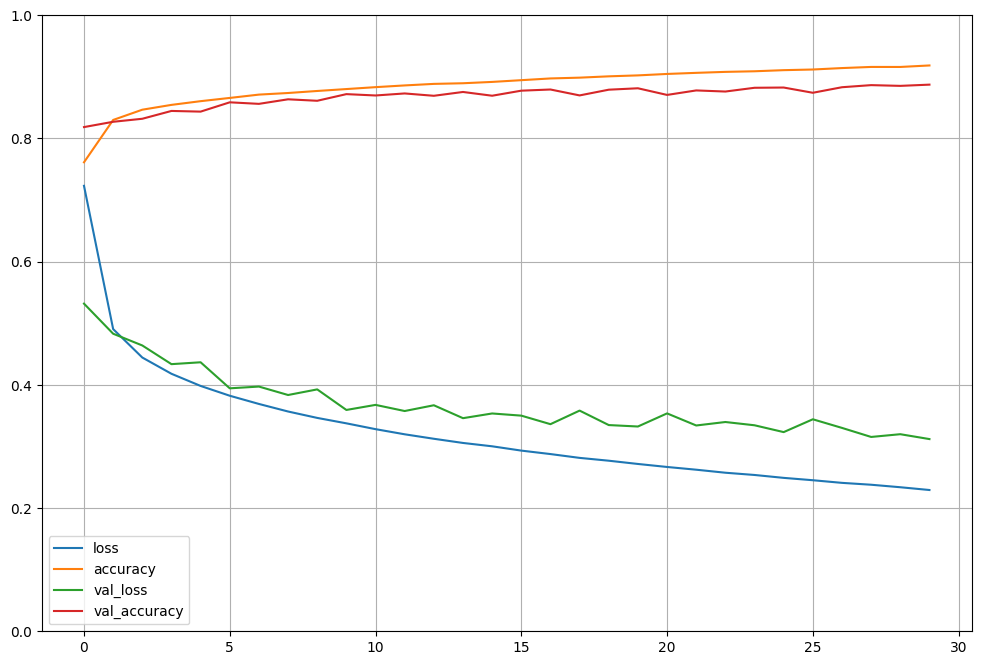

In [47]:
pd.DataFrame(model_history.history).plot(figsize=(12,8))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [48]:
X_test[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [49]:
model.evaluate(X_test/255, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3329 - accuracy: 0.8837


[0.3328878879547119, 0.8837000131607056]

In [50]:
import numpy as np
sample_image = X_test[0]
sample_image = np.expand_dims(sample_image, axis=0)

In [51]:
prediction = model.predict(sample_image)
predicted_label = np.argmax(prediction)

1/1 [==============================] - 0s 71ms/step


In [52]:
# Show class probabilities
class_probabilities = model.predict(sample_image)
class_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
probabilities = {}

1/1 [==============================] - 0s 18ms/step


In [53]:
for i, label in enumerate(class_labels):
    probabilities[label] = class_probabilities[0][i]

In [54]:
y_pred = np.argmax(model.predict(X_test), axis=1)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

313/313 [==============================] - 1s 2ms/step


NameError: ignored

In [ ]:
y_pred = model.predict(X_train[:3]/255)

In [ ]:
import numpy as np
np.around(y_pred, decimals =4)

In [ ]:
className[9]

In [ ]:
plt.imshow(X_test[0])